In [2]:
# Importing the relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DiabeTest Project
### **Goal**: Be able to preduct the Diabetes outcome based on some key metrics
### **Type**: This appears to be a labeling task, classification problem

## Part 1: Visualizing and Understanding Data

With our goal in mind, I will train a model that can predict wether a patient is diabetic or not. We will first look at our data 'diabetes.csv' which is a comma separated value file. Using the pandas library we can easily extract, read and manipulate the data.

In [3]:
def load_data(file_name):
    # A simple read file function using pandas
    csv_path = file_name
    return pd.read_csv(csv_path)

raw_data = load_data('diabetes.csv')

print(raw_data.info())
raw_data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#raw_data.hist(figsize=(20,15))

#raw_data['DiabetesPedigreeFunction'].value_counts()[0]

def check_zeros(raw_data):
    '''
    A function that checks for zeros in the data and the counts of zeros
    '''
    features = list(raw_data.columns)

    for i in features:
        try:
            zeros = raw_data[i].value_counts()[0]
            if zeros >=1:
                print(i + ' has ' + str(zeros) + ' zeros')
        except:
            print(i+ ' NO ZEROS')

    return


check_zeros(raw_data)



Pregnancies has 111 zeros
Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros
DiabetesPedigreeFunction NO ZEROS
Age NO ZEROS
Outcome has 500 zeros


From this, we see that our dataset contains 768 entries (not very large) and that it contains 9 columns. Each feature is described a little bit more in the following table:

| Entry | Pregnancies   | Glucose  | BloodPressure   |  SkinThickness  |  Insulin  | BMI |DiabetesPedigreeFunction  |  Age |  Outcome |
|------|:-:|:--:|:----:|:----:|:----:|:---:|:---:|:---:|:---:|
| Entry number    | Number of Pregnancies | Blood Glucose Levels | Blood Pressure | Thickness of skin | Blood Insulin Levels | Body Mass Index |Diabetes Risk Indicator  | Age  | Diabetic (1) or Not (0) |


From .head() we see that for some features, we have N/A values that are filled in with zeroes. Here we make some assumptions on the zeros. We will assume that 0 for pregnancies means no kids (makes sense), all other columns we will count 0 as NA. The reasoning for the aforementioned for each feature is described as following:

1. **Glucose**: if your blood glucose levels are zero, we assume you are dead (or near death) and therefore not diabetic

2. **BloodPressure**: if your blood pressure is zero, we assume you are dead (or near death) and therefore not diabetic

3. **SkinThickness**: we assume all participants have skin (This is a fair assumption)

4. **Insulin**: similar reasoning as Glucose and BloodPressure

5. **BMI**: To have a BMI of zero you must be infinitely tall or be massless particle (i.e a photon)

6. **Diabetes Pedigree Function**: HAS NO ZEROS

Age: HAS NO ZEROS




### Analysis of histograms

To gain a better understanding of the data we take a look at the histograms

It looks like some values are missing. These values are SkinThickness, Insulin, Glucose, BloodPressure, BMI and DiabetesPedigreeFunction. These values seem to have been filled in with zeros, so therefore we must insert an imputer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


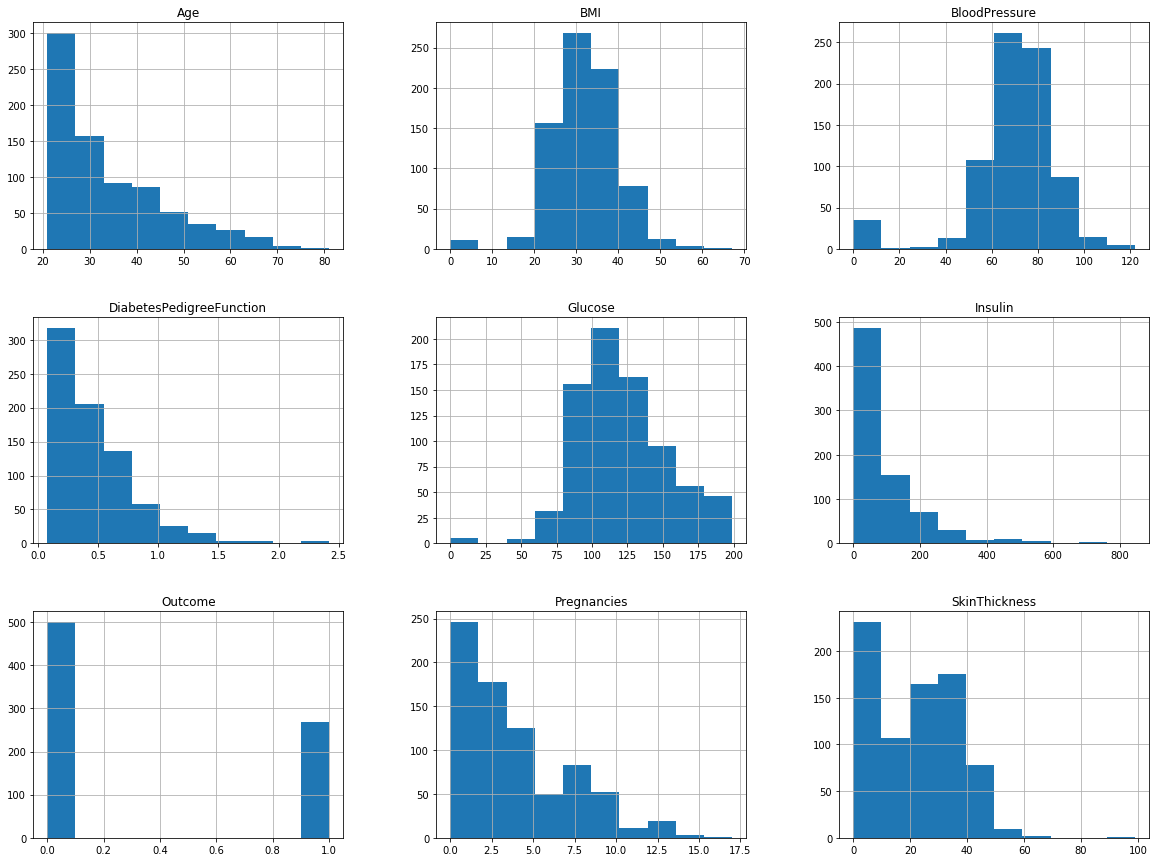

In [5]:
raw_data.hist(figsize=(20,15))

raw_data.info()

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(raw_data)
print(imputer.statistics_)

raw_data['Glucose'] = raw_data['Glucose'].replace(0,raw_data['Glucose'].mean())
raw_data['SkinThickness'] = raw_data['SkinThickness'].replace(0, raw_data['SkinThickness'].mean())
raw_data['Insulin'] = raw_data['Insulin'].replace(0, raw_data['Insulin'].mean())
raw_data['BMI'] = raw_data['BMI'].replace(0, raw_data['BMI'].mean())


[  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542   0.34895833]


<function matplotlib.pyplot.show(*args, **kw)>

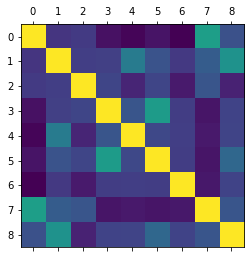

In [7]:
from pandas.plotting import scatter_matrix

data_set = raw_data.drop(['Outcome'],axis=1)
data_outcome = raw_data['Outcome']


corr_data = raw_data.corr()

corr_data['Outcome'].sort_values(ascending=False)

plt.matshow(corr_data)
plt.show

# scatter_matrix(df_p1[attributes], figsize=(12, 8))

In [8]:
# Make a training set and a testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_set, data_outcome, test_size = 0.2, random_state =42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)



In [10]:
import warnings
warnings.filterwarnings("ignore")

### Training

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, max_features=4, min_samples_split=0.05), n_estimators=1000,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'base_estimator__max_features': [3,4],
    'base_estimator__min_samples_split': [0.08, 0.05],
    'base_estimator__max_depth' : [2, 3]}
    ]

grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=4),
    n_estimators = 100, max_features = 0.5),
    param_grid, scoring = 'f1')

grid_search.fit(X_train, y_train)

# param_grid = {
#     'base_estimator__max_depth' : [1, 2, 3, 4, 5],
#     'max_samples' : [0.05, 0.1, 0.2, 0.5]
# }

# clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
#                                      n_estimators = 100, max_features = 0.5),
#                    param_grid, scoring = choosen_scoring)
# clf.fit(X_train, y_train)

grid_search.best_params_
grid_search.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=4,
                                                        max_leaf_nodes=4,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=0.05,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
          

In [21]:

grid_search.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 4,
 'base_estimator__min_samples_split': 0.05}

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(max_leaf_nodes=2, n_estimators=5000)
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
    
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score
# scores = cross_val_score(voting_clf, X_train, y_train,
#     scoring="accuracy", cv=10)

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bag_clf, X_train, y_train, cv=3)

confusion_matrix(y_train,y_train_pred)

print(accuracy_score(y_train, y_train_pred))
print(precision_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

#len(X_test)

#scores

# tree_rmse_scores = np.sqrt(-scores)

# tree_rmse_scores

# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())
#     ...
# display_scores(tree_rmse_scores)


0.755700325732899
0.7114093959731543
0.5856353591160222


In [25]:
# y_train_pred2 = cross_val_predict(bag_clf, X_test, y_test, cv=3)

# confusion_matrix(y_test,y_train_pred2)

# print(accuracy_score(y_test, y_train_pred2))
# print(precision_score(y_test, y_train_pred2))
# print(f1_score(y_test, y_train_pred2))


In [ ]:
from sklearn.metrics import accuracy_score

for clf in (bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.6428571428571429
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.7402597402597403
DecisionTreeClassifier 0.642857142

### Training the Machine 
#### Here we use Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

trainer = SGDClassifier()

trainer.fit(scale_X_train, y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:

svc_clf_predictions_train = trainer.predict(scale_X_train)

svc_clf_predictions_test = trainer.predict(scale_X_test)

svc_clf_predictions_train

aa = voting_clf.predict(scale_X_test)

In [ ]:
# Do some GridSearching

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_stats(predictions, actual):
    confusion = confusion_matrix(actual,predictions)
    accuracy = accuracy_score(actual,predictions)
    precision = precision_score(actual,predictions)
    recall = recall_score(actual,predictions)
    f1 = f1_score(actual,predictions)

    return confusion, accuracy, precision, recall, f1

# confusion, accuracy, precision, recall, f1 = get_stats(svc_clf_predictions_test,y_test)

confusion, accuracy, precision, recall, f1 = get_stats(y_train_pred,y_test)

print(accuracy)
print(precision)
print(recall)
print(f1)
confusion

ValueError: Found input variables with inconsistent numbers of samples: [154, 614]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, )

ImportError: cannot import name 'PrecisionRecallDisplay' from 'sklearn.metrics' (c:\Users\franc\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)